# Activation Visualization

### Import Packages

In [ ]:
import tensorflow as tf
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.flatten_model import flatten_condtitional
from ml_project_util.quantization_util import subsample_imgdir, activation_statistics_md, activation_range_plot
from ml_project_util.quantization_util import activation_dist_plots, activation_violin_plot, activation_box_plot

### Variable Paths & Names

In [ ]:
# dict = path_definition(ds_rel_path='catsdogsconv/CatsDogs')
dict = path_definition()
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

### Load Float Model

In [ ]:
# Two first letters for dataset, next letter stands for parameter
# 3 numbers are for the number of epochs, and the last 4 digits are for validation loss
# e.g. CD4_P2_FT_003_val0.0336
model_name = 'CD4_P2_FT_003_val0.0336'
short_name = model_name[:-10]
parent_name = model_name[:3]
filepath = f'{PATH_SAVEDMODELS}/{parent_name}/{model_name}.keras'
model = tf.keras.models.load_model(filepath)
model = flatten_condtitional(model, model_name)

### Generate Paths for n Sample Images

In [6]:
sampled_files = subsample_imgdir()

Found 24997 files belonging to 2 classes.
Using 19998 files for training.
Found 24997 files belonging to 2 classes.
Using 4999 files for validation.


### Find Activation Stats

In [ ]:
activation_statistics_md(model, sampled_files)

| Layer        |     Count |    Min |        Max |     Mean |      Std |
|--------------|-----------|--------|------------|----------|----------|
| block1_conv1 | 128450560 | 0.0000 |   884.3097 |  17.7072 |  38.0484 |
| block1_conv2 | 128450560 | 0.0000 |  4120.0786 |  94.3187 | 151.9798 |
| block2_conv1 |  64225280 | 0.0000 |  6780.0513 | 158.3406 | 220.7932 |
| block2_conv2 |  64225280 | 0.0000 | 10196.7783 | 175.6200 | 352.2243 |
| block3_conv1 |  32112640 | 0.0000 | 13303.6699 | 215.9326 | 398.9933 |
| block3_conv2 |  32112640 | 0.0000 | 11982.9180 | 249.6860 | 416.8409 |
| block3_conv3 |  32112640 | 0.0000 | 15294.8564 | 162.4988 | 400.8036 |
| block4_conv1 |  16056320 | 0.0000 |  9587.4648 | 136.4966 | 301.9890 |
| block4_conv2 |  16056320 | 0.0000 |  6527.5396 |  78.7946 | 186.9222 |
| block4_conv3 |  16056320 | 0.0000 |  3789.0747 |  21.1793 |  81.8823 |
| block5_conv1 |   4014080 | 0.0000 |  2878.2195 |  20.8781 |  62.8006 |
| block5_conv2 |   4014080 | 0.0000 |  1180.8087 | 

### Plot Separate Distribution Plots per Layer with Log Scale

In [ ]:
activation_dist_plots(sampled_files, model, model_name, mode='s')

### Plot Violin Plot for Activations per Layer

c:\Users\Aris_Work\anaconda3\envs\EnvPy3_12\Lib\site-packages\ml_project_util\quantization_util.py:317: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(y="Layer", x="Activation", data=df, scale='width', inner='quartile')


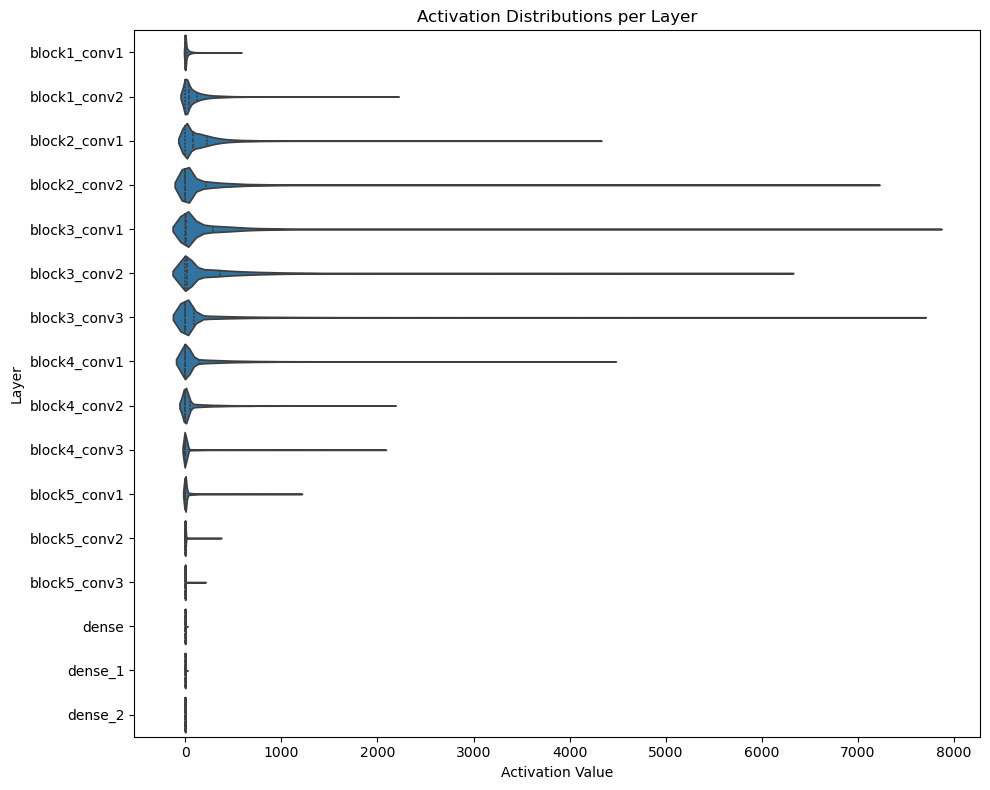

In [7]:
activation_violin_plot(sampled_files, model, model_name, mode='sv')

### Plot Box Plot for Activations per Layer

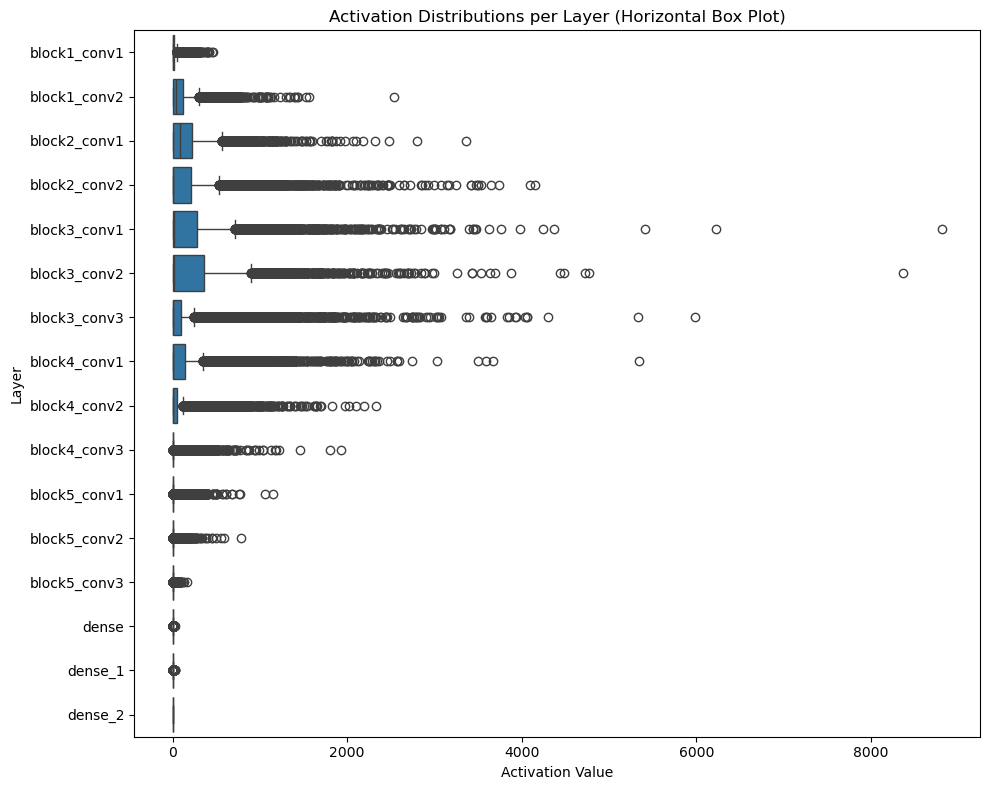

In [8]:
activation_box_plot(sampled_files, model, model_name, mode='sv')

### Plot Activation Ranges

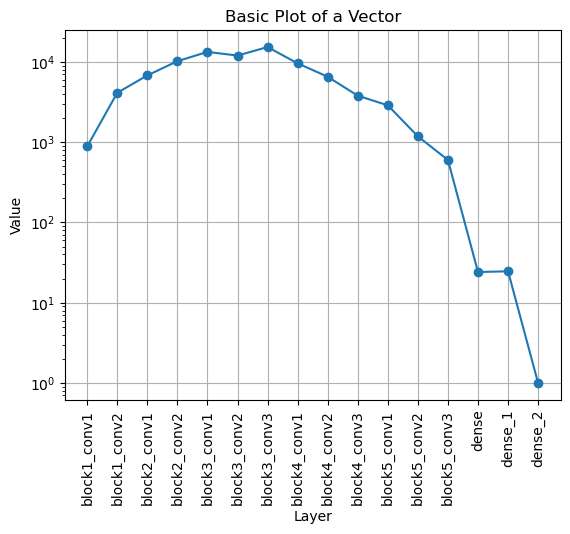

In [7]:
activation_range_plot(sampled_files, model, model_name)